In [144]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [145]:
# Definamos el sistema en una tupla
G=(lambda w0,w1,w2,w3,x0,x1,x2,x3: w0+w1+w2+w3 - 2.,  \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**1+w1*x1**1+w2*x2**1+w3*x3**1 - 0., \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**2+w1*x1**2+w2*x2**2+w3*x3**2 - 2./3, \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**3+w1*x1**3+w2*x2**3+w3*x3**3 - 0., \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**4+w1*x1**4+w2*x2**4+w3*x3**4 - 2./5, \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**5+w1*x1**5+w2*x2**5+w3*x3**5 - 0., \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**6+w1*x1**6+w2*x2**6+w3*x3**6 - 2./7, \
   lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**7+w1*x1**7+w2*x2**7+w3*x3**7 - 0.)

In [146]:
G[1](1,1,1,1,1,1,1,1)

4.0

In [147]:
def GetF(G,r):
    
    n = r.shape[0]
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])
        
    return v

In [148]:
r0 = np.array([1,1,1,1,1,1,1,1],dtype=float)
GetF(G,r0)

array([2.        , 4.        , 3.33333333, 4.        , 3.6       ,
       4.        , 3.71428571, 4.        ])

In [149]:
def Metric(G,r):
    return 0.5*np.linalg.norm(GetF(G,r))**2

In [150]:
Metric(G,r0)

52.93351473922902

In [151]:
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
                 
            J[i,j] = (f[i](rf[0],rf[1],rf[2],rf[3],rf[4],rf[5],rf[6],rf[7]) - f[i](rb[0],rb[1],rb[2],rb[3],r[4],rb[5],rb[6],rb[7]))/(2*h) 
                      
    return J

In [152]:
GetJacobian(G,r0)

array([[1.       , 1.       , 1.       , 1.       , 0.       , 0.       ,
        0.       , 0.       ],
       [1.       , 1.       , 1.       , 1.       , 0.5      , 1.       ,
        1.       , 1.       ],
       [1.       , 1.       , 1.       , 1.       , 1.0000005, 2.       ,
        2.       , 2.       ],
       [1.       , 1.       , 1.       , 1.       , 1.5000015, 3.       ,
        3.       , 3.       ],
       [1.       , 1.       , 1.       , 1.       , 2.000003 , 4.       ,
        4.       , 4.       ],
       [1.       , 1.       , 1.       , 1.       , 2.500005 , 5.       ,
        5.       , 5.       ],
       [1.       , 1.       , 1.       , 1.       , 3.0000075, 6.       ,
        6.       , 6.       ],
       [1.       , 1.       , 1.       , 1.       , 3.5000105, 7.       ,
        7.       , 7.       ]])

In [153]:
def GetFig(R,M,it):
    
    fig = plt.figure(figsize=(6,3))
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    labels = [r'$x {}$'.format(i) for i in range(len(r0)) ]
    ax.plot(R[:it],label=labels)
    ax.set_xlabel('%.0f' %(it))
    ax.legend(loc=0)

    
    ax1.plot(M[:it],'--',color='k',label='Metric: %.5f' %(M[-1]))
    ax1.set_xlabel('%.0f' %(it))
    #ax1.set_yscale('log')
    ax1.legend(loc=0)
    
    plt.show()

In [307]:
def Minimizer(G,r,lr=1e-5,epochs=int(1e5),error=4e-4):
    
    metric = Metric(G,r)
    it = 0
    
    M = np.array([])
    R = np.array([r]) # Primer valor de los parámetros
    
    while metric > error and it < epochs:
        
        # Metric
        M = np.append(M,Metric(G,r))
        
        J = GetJacobian(G,r)
        Vector = GetF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J.T,Vector) 
        
        # Momentum
        #if it > 3:
        #    r += 0.7*( R[it-1] - R[it-2] )
        
        # Agregamos el historial
        R = np.vstack((R,r))
        
        metric = Metric(G,r)          

        # Cambiar tasa
        if metric < 0.005:
            lr = 1e-3
        if metric < 0.001:
            lr = 5e-4
        
        if it%1000 == 0:
            
            clear_output(wait=True)
            
            print(lr,metric,it)
            GetFig(R,M,it)
            
        it += 1
        
    if metric < error:
        print(' Entrenamiento completo ', metric, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it

0.0005 0.00040213174704948305 39000


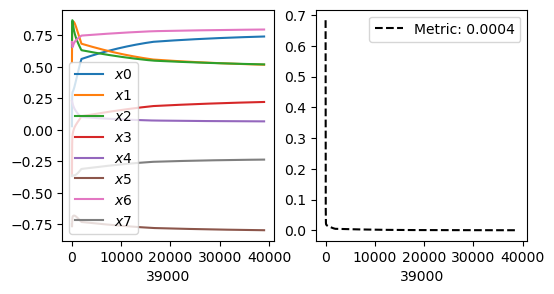

 Entrenamiento completo  0.0003999941870588176 iteraciones 39237


In [317]:
r0 = np.random.uniform(-1.,1.,size=8)
xsol,it = Minimizer(G,r0,lr=1e-2)

In [318]:
xsol

array([ 0.7406989 ,  0.51646118,  0.51913281,  0.22149922,  0.06752724,
       -0.79592242,  0.79599307, -0.23562727])

In [319]:
GetF(G,xsol)

array([-2.20789763e-03, -1.08130780e-05,  5.10795996e-03, -1.25281429e-03,
        1.63692193e-02,  7.67128481e-04, -2.23283780e-02,  5.96958438e-04])

In [320]:
Roots,Weights = np.polynomial.legendre.leggauss(4)
Roots

array([-0.86113631, -0.33998104,  0.33998104,  0.86113631])

In [321]:
Weights

array([0.34785485, 0.65214515, 0.65214515, 0.34785485])

In [322]:
f = lambda x: np.cos(x)
I = np.sum(Weights*f(Roots))
I

1.6829416886959734

In [323]:
# Aca usamos los pesos y puntos de cuadratura
Weights_ = xsol[:4]
Weights_

array([0.7406989 , 0.51646118, 0.51913281, 0.22149922])

In [324]:
Roots_ = xsol[4:]
Roots_

array([ 0.06752724, -0.79592242,  0.79599307, -0.23562727])

In [325]:
# Integral con los presos de cuadratura nueva
Inew = np.sum( Weights_*f(Roots_) )
Inew

1.6788918018153152